In [4]:
# comparison between the numerics result and the experimental data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors

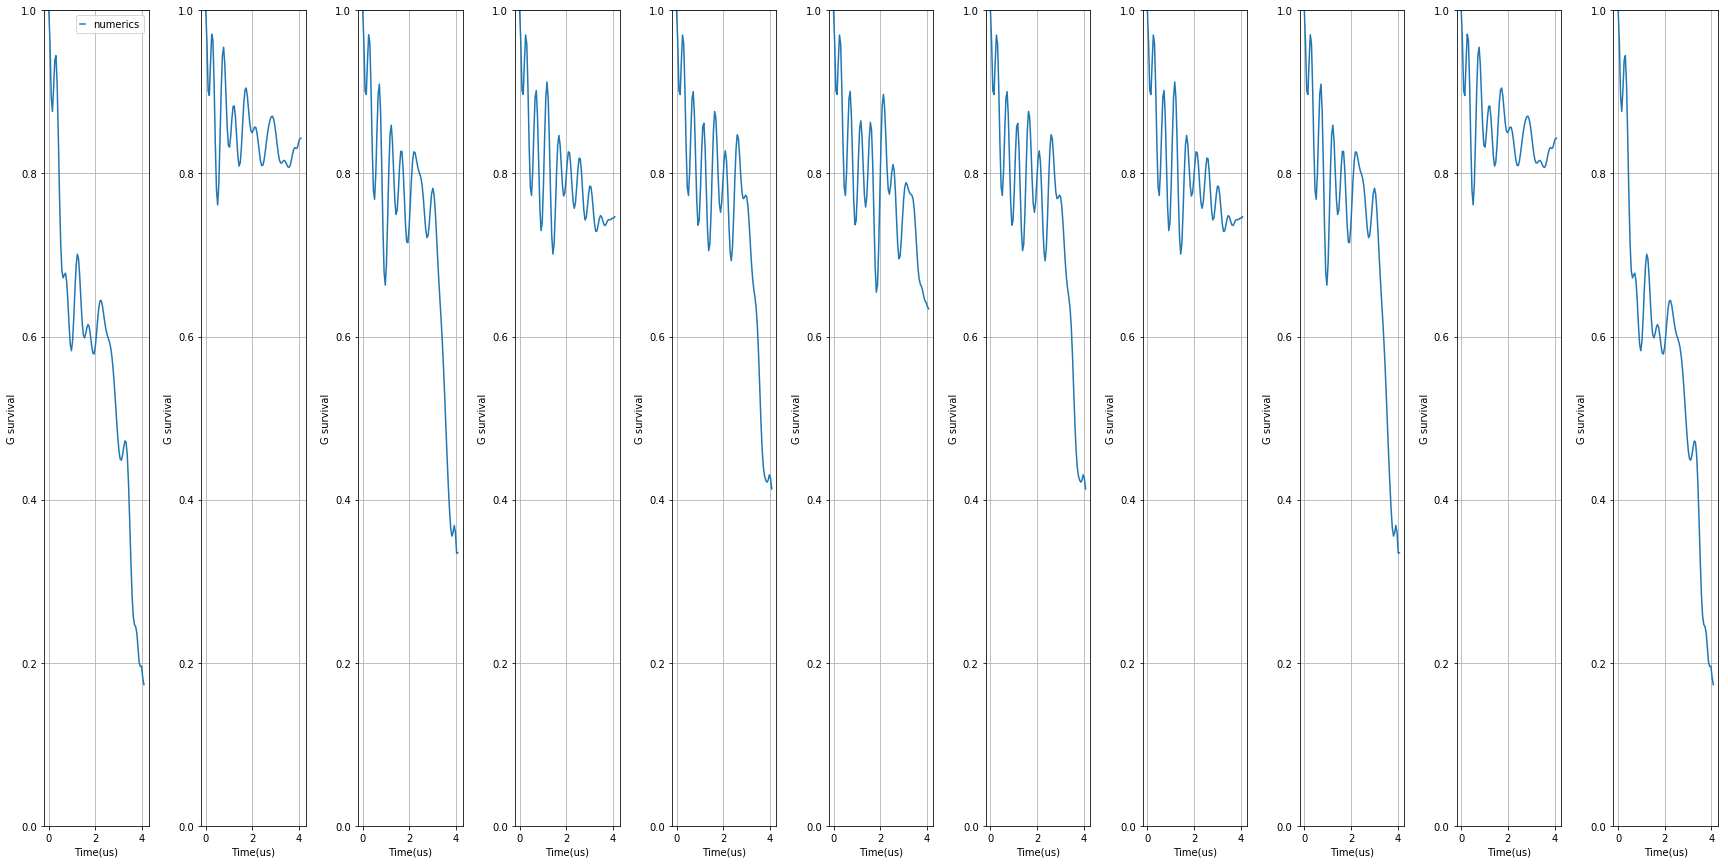

In [5]:
#11*1
#data_exp = np.loadtxt('./rydberg_data/9_6_1dexpramp$/11_1_-5_5_new.csv',delimiter=',')
data = {}
for params in [(11,1,0.0,-4,6,0.686,4,0.051,0,0.25)]:
    data[params] = {}
    data[params]['z'] = np.loadtxt("./rydberg_data/9_6_1dexpramp/z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_ramptime%.3f_dt%.3f_No%dtau1%3f.csv"%params,delimiter=',')
params = (11,1,0.0,-4,6,0.686,4,0.051,0,0.25)
dt = params[7]
temp = data[params]['z']
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(30,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    #ax[i].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(np.arange(len(temp[:,i]))*dt,1-(temp[:,i]+1)/2,ls='-',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
  #  ax[i].set_xticks([0,1,2])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()


In [ ]:
#11*1
data_exp = np.loadtxt('./rydberg_data/9_8_1d_ramptime_sweep/11_1_sweeptime.csv',delimiter=',')
data = {}

#sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0
# for params in [(11,1,0.0,-4,5,0.722,4,0.051,0)]:
#     data[params] = {}
#     data[params]['z'] = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_dt%.3f_No%d.csv"%params,delimiter=',')
params = (11,1,0.0,-4,5,0.722,4,0.051,0)
dt = params[7]
#temp = data[params]['z']
temp = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0.csv",delimiter=',')
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(20,3))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    ax[i].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(data_exp[0,:],1-(temp[:,i]+1)/2,marker='o',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
    ax[i].set_xticks([0,2,4,6])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    #ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()

In [3]:
#temp[site,time]
Lt = len(data_exp[0,:])
site = 11
sigma_sim = np.zeros(Lt)
sigma_exp = np.zeros(Lt)
data_exp_survival = data_exp[1:11,:]
x = data_exp[0,:]
for j in range(Lt):
    for i in range(site-1-1):
        sigma_sim[j] = sigma_sim[j]+((1-(temp[j,i]+1)/2)-(1-(temp[j,i+1]+1)/2))*(-1)**(i+1)
        sigma_exp[j] = sigma_exp[j]+(data_exp_survival[i,j]-data_exp_survival[i+1,j])*(-1)**(i+1)
print(sigma_sim)
print(sigma_exp)
plt.plot(x, sigma_sim, color='r',marker='o',linestyle='dashed',label='Simulation')
plt.plot(x, sigma_exp, color='b',marker='o',linestyle='dashed',label='Experiment')
plt.legend()
plt.grid()


NameError: name 'data_exp' is not defined